<center><br><font size=10>Pandas Tutorial</font><br>
<b>Introduction to Machine Learning</b>
<br><br>


In this notebook, we'll learn the basics of data analysis with the Python Pandas library.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width=500>
<br><br>For that, we will use an **IMDb** Data Set!<br><br>
<img src="https://m.media-amazon.com/images/G/01/IMDb/BG_rectangle._CB1509060989_SY230_SX307_AL_.png" width=200>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

# Pandas Objects

## Series
The basic Pandas object: **A one-Dimentional array, with index and values.**
<br>Equivilant to 1-d numpy array.

In [2]:
s = pd.Series([1,3,5,np.nan,6,8], index = ["A", "B", "C", "D", "E", "F"])
s

A    1.0
B    3.0
C    5.0
D    NaN
E    6.0
F    8.0
dtype: float64

In [3]:
print(s.mean())
print(s.std())

4.6
2.701851217221259


## DataFrame
**The MOST IMPORTANT pandas object**, equivilant to 2-d numpy array.
<br><br>
**Main features**:
- The **DataFrame** has both row and column index!
- Each column can be in a different type
- Size mutable: insert and delete columns

In [5]:
df = pd.DataFrame(np.random.randn(6,4), columns=["A","B","C","D"], index = [2,3,4,5,6,7])
df

,A,B,C,D
2,0.363057,-1.619529,0.867002,0.657334
3,1.639379,0.211735,-0.629898,-1.685680
4,0.257940,0.063767,-0.082124,-0.978041
5,0.172728,2.176396,0.414243,2.098391
6,-1.293616,-1.068568,-0.354226,-0.150228
7,0.236928,0.015667,0.294123,0.973523


Creating a DataFrame by passing a dict of objects that can be converted to series-like (less common).

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), # a one timestamp object ('2013-01-02')
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),  # a series of "1"s, length=4
                    'D': np.array([3] * 4, dtype='int32'),  # a numpy array of "3"s, length=4
                    'E': pd.Categorical(["test", "train", "test", "train"]),  # a pandas catergorical array (like a list)
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Create DataFrame from .csv file

In [7]:
url = 'https://raw.githubusercontent.com/alexbelengeanu/PS1_2021_Alca/main/IMDB-Movie-Data.csv?token=GHSAT0AAAAAABSX73XC6CHFJSZFVAVOB2TAYSYIY3Q'

In [8]:
df = pd.read_csv(url, index_col=0) # index_col - Choose which column of the data is going to be the index.

---
# DataFrame Attributes and Methods

## `head()` & `tail()`
Viewing the top (or bottom) rows of your data (5 rows if not defined other).

In [9]:
df.head(3)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [10]:
df.tail(2)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


## `columns`

In [11]:
df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## `rename`
Let's do a tiny columns cleanup.

In [12]:
df.rename(columns={ 'Runtime (Minutes)': 'Runtime', 
                    'Revenue (Millions)': 'Revenue_millions'
                   }, inplace=True) # Note the inplace!

df.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [13]:
df.columns = [col.lower() for col in df]
df.columns

Index(['title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime', 'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

## `shape`

In [14]:
df.shape

(1000, 11)

## `dtype`
The columns of the resulting DataFrame have different **dtypes** (data types).

In [15]:
df.dtypes

title                object
genre                object
description          object
director             object
actors               object
year                  int64
runtime               int64
rating              float64
votes                 int64
revenue_millions    float64
metascore           float64
dtype: object

*__note__: "object" dtype means string. Will be assigned to your column if column has mixed types (numbers and strings).*

## `index`
The indeces of the data (row)

In [16]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', name='Rank', length=1000)

We can also reset the index:

In [17]:
new_idx_df = df.reset_index()
new_idx_df.head(3)

,Rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## `values`
Returns the DataFrame as a numpy array.

In [18]:
df.iloc[1].values

array(['Prometheus', 'Adventure,Mystery,Sci-Fi',
       'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
       'Ridley Scott',
       'Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron',
       2012, 124, 7.0, 485820, 126.46, 65.0], dtype=object)

## `describe()` (statistics)
shows a quick statistic summary of your data.

In [19]:
df.describe()

,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


All statistics above can be generated seperetly with their names as methods:
- `df.count()`
- `df.mean()`
- `df.std()`
- `df.max()`
- `df.min()`

## Sorting (Order By in SQL)
### `sort_values()`
Sorting by a specific column.

In [20]:
df = df.sort_values(by ="rating", ascending = False)  # default - ascending=True
df = df.sort_values(by =["rating", "votes"], ascending = False)
df.head(3)

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN


### `sort_index()`
Sort index - using **index (axis = 0)** or **columns (axis = 1)** - important!

In [22]:
df = df.sort_index(axis = 0, ascending = True)
df.head(3)

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


## `append()`

Append rows of another DataFrame to the end of this frame, returning a new object.<br>
Columns not in this frame are added as new columns.

In [23]:
temp_df = df.append(df)
temp_df.shape

(2000, 11)

## `remove_duplicates()`

In [24]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

method will also return a copy of your DataFrame, but this time with duplicates removed. Calling ``.shape`` confirms we're back to the 1000 rows of our original dataset.<br>  Using ``inplace=True`` will modify the DataFrame object in place

In [25]:
temp_df.drop_duplicates(inplace=True)

---
# Relational Algebra

## Projection ("Select" in SQL)

**Single column**

In [31]:
df["title"][0:7] # Will yield a *Series*

Rank
1    Guardians of the Galaxy
2                 Prometheus
3                      Split
4                       Sing
5              Suicide Squad
6             The Great Wall
7                 La La Land
Name: title, dtype: object

**Multiple Columns**

In [32]:
df[["title","genre"]][0:7]  # Will yeild a DataFrame

,title,genre
Rank,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi"
2,Prometheus,"Adventure,Mystery,Sci-Fi"
3,Split,"Horror,Thriller"
4,Sing,"Animation,Comedy,Family"
5,Suicide Squad,"Action,Adventure,Fantasy"
6,The Great Wall,"Action,Adventure,Fantasy"
7,La La Land,"Comedy,Drama,Music"


## Selection / Slicing ("Where" in SQL)

### `.loc` - Slicing by Label

``.loc`` is primarily **index label based**, but may also be used with a boolean array. ``.loc`` will raise ``KeyError`` when the items are not found.

In [33]:
df.loc[10078]

KeyError: ignored

### `.iloc` - Slicing by position
(index position or column position)

In [34]:
df.iloc[3:5, 0:4]

,title,genre,description,director
Rank,,,,
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer


### Slicing by Conditions -  Boolean Masks
**Important!!**

In [35]:
short_df = df.head()

In [36]:
short_df["year"] >= 2015

Rank
1    False
2    False
3     True
4     True
5     True
Name: year, dtype: bool

In [37]:
short_df2 = short_df[short_df["year"] >= 2015]
short_df2

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### and / or
**We can also use the and ("&") or ("|") operators.**

In [38]:
df[(df['director'] == 'Christopher Nolan') & (df["year"] >= 2009)].head()

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0


#### `isin()`

**We can also use the `isin()` function:**

In [39]:
df[df['director'].isin(['Alfonso Cuarón', 'Kathryn Bigelow'])]

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
247,Children of Men,"Drama,Sci-Fi,Thriller","In 2027, in a chaotic world in which women hav...",Alfonso Cuarón,"Julianne Moore, Clive Owen, Chiwetel Ejiofor,M...",2006,109,7.9,382910,35.29,84.0
407,Zero Dark Thirty,"Drama,History,Thriller",A chronicle of the decade-long hunt for al-Qae...,Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,95.72,95.0
510,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0
673,The Hurt Locker,"Drama,History,Thriller","During the Iraq War, a Sergeant recently assig...",Kathryn Bigelow,"Jeremy Renner, Anthony Mackie, Brian Geraghty,...",2008,131,7.6,352023,15.70,94.0


## Grouping (GroupBy in SQL)

A ``groupby`` operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [40]:
df.groupby("director").size()[:5]

director
Aamir Khan             1
Abdellatif Kechiche    1
Adam Leon              1
Adam McKay             4
Adam Shankman          2
dtype: int64

** We can use aggregate functions except counting.**
```
SELECT director, AVG(rating) as average_rating, COUNT(*)

FROM movies

GROUP BY director

ORDER BY average_rating
```

In [41]:
df.groupby("director").agg({'rating': np.mean, "director":np.size}).sort_values(by ="rating", ascending = False).head()

,rating,director
director,,
Nitesh Tiwari,8.80,1
Christopher Nolan,8.68,5
Olivier Nakache,8.60,1
Makoto Shinkai,8.60,1
Aamir Khan,8.50,1


Notice that in the new DataFrame object, created by the groupby, the index is the column grouped by.

For more SQL comparisons: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

---
# Data Exploration and Preparation

## Missing Values

`isnull()` returns a DataFrame where each cell is either True or False depending on that cell's null status.

In [42]:
df.iloc[0:5].isnull()

,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Rank,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False


To count the number of nulls in each column we use an aggregate function for summing:

In [43]:
df.isnull().sum()

title                 0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

### Dropping missing values - `dropna()`

In [44]:
df.dropna().isnull().sum()

title               0
genre               0
description         0
director            0
actors              0
year                0
runtime             0
rating              0
votes               0
revenue_millions    0
metascore           0
dtype: int64

We can also drop columns (and not rows) by adding `axis = 1`

In [45]:
df.dropna(axis = 1).isnull().sum()

title          0
genre          0
description    0
director       0
actors         0
year           0
runtime        0
rating         0
votes          0
dtype: int64

### Imputing Missing Values - `fillna()`

In [46]:
revenue = df["revenue_millions"]
revenue.isnull().sum()

128

In [47]:
revenue_mean = revenue.mean()
revenue.fillna(revenue_mean, inplace=True) # note the "inplace". Values can also be imputer by row, by adding axis = 0
revenue.isnull().sum()

0

##  Normalization - Arithmetic Operations

For example, lest's normalize the votes column to be between 1 to 0 (min-max normalization)

In [48]:
df_copy = df.copy() # We want to COPY the DataFrame. Without using the "copy()" function, the new df will be a pointer to the old one.
df_copy["norm_votes"] = (df_copy["votes"] - df_copy["votes"].min()) / (df_copy["votes"].max() - df_copy["votes"].min())
df_copy[["norm_votes","votes"]].head()

,norm_votes,votes
Rank,,
1,0.422474,757074
2,0.271093,485820
3,0.087923,157606
4,0.033755,60545
5,0.219697,393727


### Broadcasting
Notice the Broadcasting in last line, in the `df_copy["votes"] - df_copy["votes"].min()` operation (an integer minus a series)!

## Feature Extraction / Engineering - `apply`

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the DataFrame, along its axis. 
For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad.

In [49]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what apply() does:

In [50]:
df["rating_category"] = df["rating"].apply(rating_function)

df[["title","rating","rating_category"]].head()

,title,rating,rating_category
Rank,,,
1,Guardians of the Galaxy,8.1,good
2,Prometheus,7.0,bad
3,Split,7.3,bad
4,Sing,7.2,bad
5,Suicide Squad,6.2,bad


We can also use anonymous functions as well. This `lambda` function achieves the same result as rating_function:

In [51]:
df["rating_category"] = df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

df[["title","rating","rating_category"]].head()

,title,rating,rating_category
Rank,,,
1,Guardians of the Galaxy,8.1,good
2,Prometheus,7.0,bad
3,Split,7.3,bad
4,Sing,7.2,bad
5,Suicide Squad,6.2,bad


## Plotting

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 10, 'figure.figsize': (6, 4)}) # set font and plot size to be larger

### Scatter

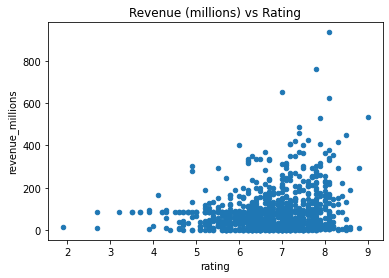

In [53]:
df.plot.scatter(x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');
plt.show()

### Distributions

#### Histogram

Let's plot the rating distribution:

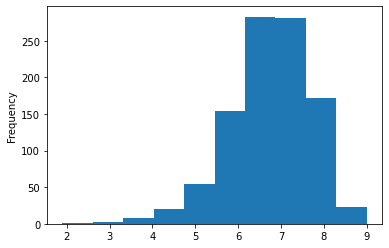

In [54]:
df['rating'].plot.hist()
plt.show()

We can also plot multiple histograms

#### Bar Plot

Let's plot how many films where created in each genre:

In [55]:
df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

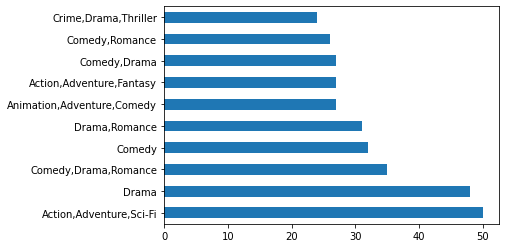

In [56]:
df['genre'].value_counts().head(10).plot.barh()
plt.show()

### Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


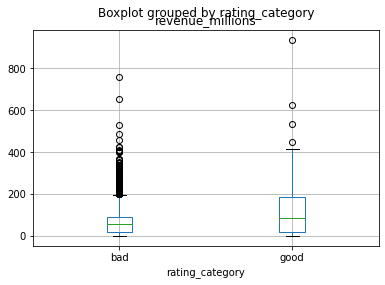

In [57]:
df.boxplot(column='revenue_millions', by='rating_category');
plt.show()

## Correlations

By using the correlation method .corr() we can generate the relationship between each continuous variable:

In [58]:
df.corr()

,year,runtime,rating,votes,revenue_millions,metascore
year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


### Heatmap

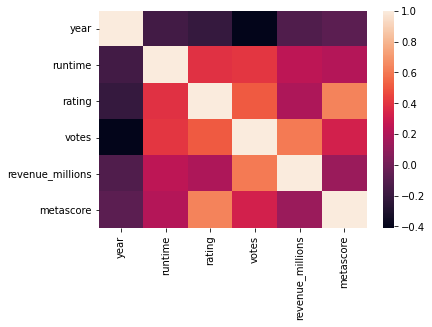

In [59]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)
plt.show()

# Saving the Data

In [ ]:
# Saving dataframe to CSV
from google.colab import files
df.to_csv('movies-db-processed.csv', index=False)
files.download('movies-db-processed.csv')